# Session 11: Deep Neural Networks, Convolutional Networks

### Problem 1: Neural Network on Scenario 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

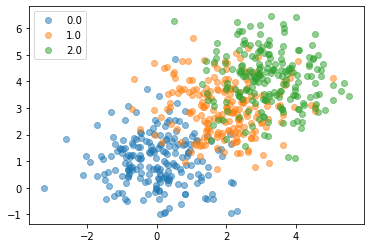

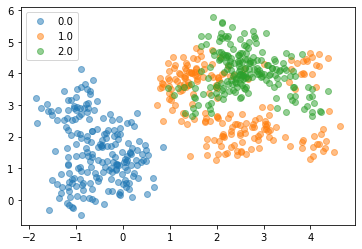

In [44]:
mu1 = [0,1]
mu2 = [2,3]
mu3 = [3,4]
n_data_points = 200
plot_graphs = 1

np.random.seed(42)
xa = np.random.multivariate_normal(mu1, np.eye(2), n_data_points)
ya = np.zeros(n_data_points)

xb = np.random.multivariate_normal(mu2, np.eye(2), n_data_points)
yb = np.ones(n_data_points)

xc = np.random.multivariate_normal(mu3, np.eye(2), n_data_points)
yc = [yb+1 for yb in yb]

data_x = np.concatenate((xa, xb, xc))
data_y = np.concatenate((ya, yb, yc)).reshape(-1, 1)

data_scenario1 = pd.DataFrame(data=np.concatenate((data_x, data_y), 1), columns=['X1', 'X2', 'Y'])

groups = data_scenario1.groupby('Y')

if plot_graphs == 1:
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.plot(group['X1'], group['X2'], marker='o', linestyle='', alpha=.5, label=name)
    ax.legend(loc="upper left")
    plt.savefig("Scenario1.png")
    plt.show()
    
###########################################

n_groups = 10
X2 = np.empty((0, 2))
mean_all = np.random.multivariate_normal(mu1, np.eye(2), n_groups)
for mu in mean_all:
    X2 = np.vstack(
        [X2, np.random.multivariate_normal(mu, 0.1 * np.eye(2), int(round(n_data_points / 10)))])

mean_all = np.random.multivariate_normal(mu2, np.eye(2), n_groups)
for mu in mean_all:
    X2 = np.vstack(
        [X2, np.random.multivariate_normal(mu, 0.1 * np.eye(2), int(round(n_data_points / 10)))])

mean_all = np.random.multivariate_normal(mu3, np.eye(2), n_groups)
for mu in mean_all:
    X2 = np.vstack(
        [X2, np.random.multivariate_normal(mu, 0.1 * np.eye(2), int(round(n_data_points / 10)))])
    
data_scenario2 = pd.DataFrame(data=np.concatenate((X2, data_y), 1), columns=['X1', 'X2', 'Y'])

groups = data_scenario2.groupby('Y')

if plot_graphs == 1:
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.plot(group['X1'], group['X2'], marker='o', linestyle='', alpha=.5, label=name)
    ax.legend(loc="upper left")
    plt.savefig("Scenario2.png")
    plt.show()


In [11]:
from sklearn.model_selection import train_test_split # split the data into training and testing
from sklearn.preprocessing import scale # scale and center data

#### Splitting into Dependent and Independent variables

In [13]:
X = data_scenario2.drop('Y', axis=1).copy()
X.head()

,X1,X2
0,0.774703,0.929630
1,1.665259,0.369216
2,0.797404,0.943556
3,1.437788,0.318612
4,0.805409,0.394847


In [48]:
y = data_scenario2['Y'].copy()
y.head()
y.unique()

array([0., 1., 2.])

#### Creating the training and testing data for the NN

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [37]:
data_scenario_2 = data_scenario2.to_csv('scenario2.csv', index = True)
print('\nCSV String:\n', data_scenario_2)


CSV String:
 None


#### We can create a basic MLP classifier with scikit-learn

In [23]:
import joblib
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network


--- Class balance ---
(array([0, 1, 2, 3, 4, 5]), array([34, 54, 61, 80, 62,  9]))
(array([0, 1, 2, 3, 4, 5]), array([33, 53, 61, 80, 63, 10]))

-- Training data --
Accuracy: 37.00
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68        34
           1       0.22      0.15      0.18        54
           2       0.00      0.00      0.00        61
           3       0.35      0.99      0.51        80
           4       0.00      0.00      0.00        62
           5       0.00      0.00      0.00         9

    accuracy                           0.37       300
   macro avg       0.20      0.31      0.23       300
weighted avg       0.21      0.37      0.25       300

Confusion Matrix:
[[24 10  0  0  0  0]
 [13  8  0 33  0  0]
 [ 0 17  0 44  0  0]
 [ 0  1  0 79  0  0]
 [ 0  0  0 62  0  0]
 [ 0  0  0  9  0  0]]


-- Testing data --
Accuracy: 35.67
Classification Report:
              precision    recall  f1-score   s

/Users/Ivan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ivan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ivan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ivan/opt/anacon

AttributeError: 'function' object has no attribute 'predictions'

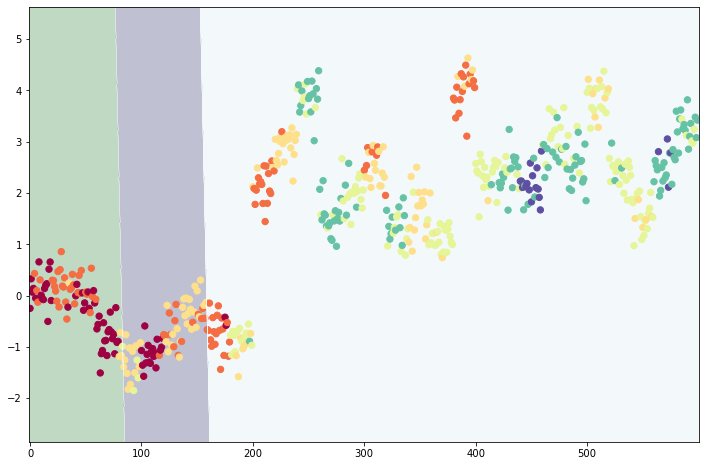

In [50]:
def train_and_evaluate(X_train, Y_train, X_test, Y_test):
    
    # Create a model
    model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(3, 4), activation='relu', solver='adam',
                                                max_iter=1000, learning_rate='constant', learning_rate_init=0.001)
    
    # Train the model on the whole dataset
    model.fit(X_train, Y_train)
    
    # Save the model
    joblib.dump(model, 'mlp_classifier.jbl')
    
    # Evaluate on training data
    print('\n-- Training data --')
    predictions = model.predict(X_train)
    accuracy = sklearn.metrics.accuracy_score(Y_train, predictions)
    print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
    print('Classification Report:')
    print(sklearn.metrics.classification_report(Y_train, predictions))
    print('Confusion Matrix:')
    print(sklearn.metrics.confusion_matrix(Y_train, predictions))
    print('')
    
    # Evaluate on test data
    print('\n-- Testing data --')
    predictions = model.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
    print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
    print('Classification Report:')
    print(sklearn.metrics.classification_report(Y_test, predictions))
    print('Confusion Matrix:')
    print(sklearn.metrics.confusion_matrix(Y_test, predictions))
    

# Plot the classifier
def plot_classifier(X, Y):
    
    # Load the model
    model = joblib.load('mlp_classifier.jbl')
    # Calculate
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Make predictions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot diagram
    fig = plt.figure(figsize = (12, 8))
    plt.contourf(xx, yy, Z, cmap='ocean', alpha=0.25)
    plt.contour(xx, yy, Z, colors='w', linewidths=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap='Spectral')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.savefig('mlp_classifier.png')


# The main entry point for this module
def main():
    # Load data set (includes header values)
    dataset = pd.read_csv('scenario2.csv')
    # Slice data set in data and labels (2D-array)
    X = dataset.values[:,0:2] # Data
    Y = dataset.values[:,2].astype(int) # Labels
    # Split data set in train and test (use random state to get the same split every time, and stratify to keep balance)
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.5, random_state=5, stratify=Y)
    # Make sure that data still is balanced
    print('\n--- Class balance ---')
    print(np.unique(Y_train, return_counts=True))
    print(np.unique(Y_test, return_counts=True))
    # Train and evaluate
    train_and_evaluate(X_train, Y_train, X_test, Y_test)
    # Plot classifier
    plot_classifier(X, Y)
    
    
if __name__ == '__main__':main()

In [49]:
predictions.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

### Problem 2: How to perform multimodal regression using a NN

**Mixture Density Network**: As a basis, we use a Gaussian Mixture Model and then can use the mean, standard deviation, and mixing coefficients in order to obtain a log likelihood. In the output layer, it works like a GMM.

**Loss Functions**:
- L1 Loss stands for Least Absolute Deviations (LAD). This is used to minimize the error which is the sum of all *absolute* differences between the true and predicted values.
- L2 Loss is used to minimize the error which is the sum of all the *squared* differences between true and predicted values.
- L2 Loss is preferred in most cases, but when outliers are present, absolute loss is preferred.
- Multi-Bin loss: if your target distribution is bimodal, an intuitive way to do this is to find which mode (or 'bin') the target belongs to and then regress the offset from the mode center. This can be 

**Multimodal Regression**: We are looking to regress a continuous target for a wide range of Gaussian-like target distributions. Minimuzing L2 loss, which is the same as maximizing the log-likelihood of a Gaussian, fails when our distribution is not Gaussian. Typicaly, some ordinal logistic or other ordinal model can be used instead.

**Convolutional Neural Networks**: More often utilized for classification and computer vision tasks. Three main types of layers:
- Convolutional Layer
- Pooling Layer
- Fully-connected layer

    1. Convolutional Layer\
        We need input data, a filter, and a feature map. The filter passes by each set of points on the data and outputs it into a feature map. Hyperparameters that need to be set beforehand include: number of filters, stride, zero-padding.
    2. Pooling layer\
        This conducts dimensionality reduction, reducing the number of parameters in the input. This also sweeps a filter across the entire input, but the filter doesn't have any weights.
    3. Fully-Connected layer\
        Each node in the output layer connects directly to a node in the previous layer. This layer performs the task of classification based on the features extracted through the previous layers and the different filters.



### Problem 3: What are Deep Neural Networks?
Feedforward Neural Network with more hidden layers. Maybe a shallow NN needs more neurons? Shallow network is more difficult to train? Shallow architecture does not fit to the kind of problems we are usually trying to solve?
- overfitting
- computation time
- accuracy
- performance

### Problem 4: Why is regularization relevant for NN?

Regularization reduces overfitting/variance. Some complexities may not help our model generalize well even if it fits the training data. Here we just add a penalty to our loss function. This adds L2 loss. 

- Could set weights close to zero which would reduce the impact our our hidden layers close to zero.
- Simplify our model
- Regularizers allow us to apply penalties to layer parameters or layer activity during optimization
- Setting regularization for layers instead of the entire model

Adding the regularization component will drive the values of the weight matrix down. This will effectively decorrelate the neural network. **Dropout** would involve going over all the layers in a NN and setting probability of keeping certain nodes or not. Dropouts mean that the NN cannot rely on any input node, since each have a random probability of being removed.NN will be reluctant to give high weights to certain features because they might disappear.

### Problem 5: Compare between different ways to use regularization in NN
- Dropout uses probabilities to decide whether or not to keep a NN
- L2 Regularization uses L2 Loss which will penalize large weights of neutrons
- Batch Normalization introduces data as batch inputs so the neural network can then treat each batch as if from a different distribution. Also known as internal covariate shift.

### Problem 6: Differences between L1 and L2 norm

- L1 Loss stands for Least Absolute Deviations (LAD). This is used to minimize the error which is the sum of all *absolute* differences between the true and predicted values.
- L2 Loss is used to minimize the error which is the sum of all the *squared* differences between true and predicted values.
- L2 Loss is preferred in most cases, but when outliers are present, absolute loss is preferred.

L2 norm increases very slowly near the origin. L1 norm actually grows at the same rate in all locations. 
- The gradient on the L1 norm is constant with respect to the magnitude of each vector component
- The gradient for the L2 norm works well with large values, but not with smaller values. 
- Use L1 norm when you want sparsity
- Use L2 norm when you don't want large activations

### Problem 7: Regularization in a NN

### Problem 8: Issues with Sigmoid, ReLU in the fully connected layer

**Vanishing Gradient Problem**: As more layers using certain activation functions are added to neural networks, the gradient of the loss function approaches zero. 

- Sigmoid squishes a large input space into a small input space between 0 and 1. Large change in input of sigmoid will cause a small change in the output

When more layers are used, it can cause the gradient to be too small for training to work effectively. When n hidden layers use an activation function like sigmoid, n small derivatives are multiplied together. Gradient decreases exponentially as we propagate down to the initial layers.

https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484

### Problem 9: Neural Network with MNIST

### Problem 10: Convolution Operation

**Convolution**: An integral that expresses the amount of overlap of one function g as it is shifted over another function f. Can *blend* one function with another.

**Convolution Operation**: Mathematical operation on two functions that produces a third function that expresses how the shape of one function is modified by another

Thanks to convolutions, a ML algorithm only has to find weights for every cell in the convolutional filter, dramatically reducing the memory needed to train the model.
- Sparse Interaction: 
- Parameter sharing: sinlge 2D slice, neurons are constrained to use the same set of weights. Each element of the weight matrix is used once and then never revisited, while convolution network has shared parameters. 
- Equivariant Representation: The layers of convolution

### Problem 11: Local Receptive Field

- All input neurons are just pixel intensities of an input image
- If neuron is connected to only a small region of the input layer neurons then that region in the input image is called the Local Receptive Field.
- Pooling takes certain areas of the matrix and you can reduce the size of the matrix. Max pooling vs average pooling.

### Problem 12: Padding a CNN
Some edges may get 'trimmed off' in the process of sliding. The pixels on the edges are preserved as 'fake pixels' in order for the image to fit.

### Problem 13: Output size of an activation map
